In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
coordinates = list(lat_lngs)

In [19]:
from citipy import citipy


In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [21]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7bc554b611b9e48c4747845c46ca5300


In [23]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rungata
City not found. Skipping...
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | waipawa
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | neiafu
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | yatou
Processing Record 11 of Set 1 | along
Processing Record 12 of Set 1 | centralia
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | resistencia
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | inyonga
Processing

Processing Record 37 of Set 4 | nahrin
Processing Record 38 of Set 4 | buchanan
Processing Record 39 of Set 4 | sao carlos
Processing Record 40 of Set 4 | puerto ayora
Processing Record 41 of Set 4 | omboue
Processing Record 42 of Set 4 | butaritari
Processing Record 43 of Set 4 | kudahuvadhoo
Processing Record 44 of Set 4 | bayan
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | burica
City not found. Skipping...
Processing Record 47 of Set 4 | chulman
Processing Record 48 of Set 4 | lata
Processing Record 49 of Set 4 | suffern
Processing Record 50 of Set 4 | cidreira
Processing Record 1 of Set 5 | voznesenye
Processing Record 2 of Set 5 | saint-georges
Processing Record 3 of Set 5 | shingu
Processing Record 4 of Set 5 | khonuu
City not found. Skipping...
Processing Record 5 of Set 5 | bredasdorp
Processing Record 6 of Set 5 | cockburn harbour
City not found. Skipping...
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | hobyo
Processing Reco

Processing Record 28 of Set 8 | bom jardim
Processing Record 29 of Set 8 | miri
Processing Record 30 of Set 8 | nema
Processing Record 31 of Set 8 | bonavista
Processing Record 32 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 33 of Set 8 | belaya gora
Processing Record 34 of Set 8 | baherden
Processing Record 35 of Set 8 | tunduru
City not found. Skipping...
Processing Record 36 of Set 8 | gisors
Processing Record 37 of Set 8 | maceio
Processing Record 38 of Set 8 | santa fe
Processing Record 39 of Set 8 | surab
Processing Record 40 of Set 8 | iskateley
Processing Record 41 of Set 8 | belyy yar
Processing Record 42 of Set 8 | yei
Processing Record 43 of Set 8 | nuuk
Processing Record 44 of Set 8 | baruun-urt
Processing Record 45 of Set 8 | pogoanele
Processing Record 46 of Set 8 | pacifica
Processing Record 47 of Set 8 | candido mendes
Processing Record 48 of Set 8 | dehloran
Processing Record 49 of Set 8 | zhezkazgan
Processing Record 50 of Set 8 | yarim
Processing

Processing Record 18 of Set 12 | kamen-rybolov
Processing Record 19 of Set 12 | xuddur
Processing Record 20 of Set 12 | noumea
Processing Record 21 of Set 12 | azad shahr
Processing Record 22 of Set 12 | mopti
Processing Record 23 of Set 12 | aras
Processing Record 24 of Set 12 | eureka
Processing Record 25 of Set 12 | rapid valley
Processing Record 26 of Set 12 | ubinskoye
Processing Record 27 of Set 12 | cururupu
Processing Record 28 of Set 12 | lincoln
Processing Record 29 of Set 12 | krasnoarmeysk
Processing Record 30 of Set 12 | midland
Processing Record 31 of Set 12 | ishinomaki
Processing Record 32 of Set 12 | vestmannaeyjar
Processing Record 33 of Set 12 | pangody
Processing Record 34 of Set 12 | medicine hat
Processing Record 35 of Set 12 | brufut
Processing Record 36 of Set 12 | rindal
Processing Record 37 of Set 12 | jiddah
City not found. Skipping...
Processing Record 38 of Set 12 | mahibadhoo
Processing Record 39 of Set 12 | dicabisagan
Processing Record 40 of Set 12 | ray

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,58.84,86,100,14.38,AU,2022-11-07 18:39:17
1,Waipawa,-41.4122,175.5153,52.63,78,5,1.74,NZ,2022-11-07 18:39:17
2,Ushuaia,-54.8000,-68.3000,62.22,48,75,6.91,AR,2022-11-07 18:39:17
3,Busselton,-33.6500,115.3333,53.51,91,7,10.38,AU,2022-11-07 18:39:19
4,Neiafu,-18.6500,-173.9833,75.88,78,20,4.61,TO,2022-11-07 18:39:19
5,Albany,42.6001,-73.9662,69.58,29,0,3.00,US,2022-11-07 18:37:38
6,Hobart,-42.8794,147.3294,53.46,91,100,10.36,AU,2022-11-07 18:39:22
7,Port Alfred,-33.5906,26.8910,64.18,91,100,1.99,ZA,2022-11-07 18:39:22
8,Yatou,37.1500,122.3833,50.41,88,0,5.44,CN,2022-11-07 18:39:23
9,Along,28.1667,94.7667,58.87,90,4,1.63,IN,2022-11-07 18:39:23


In [29]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2022-11-07 18:39:17,-33.8667,121.9000,58.84,86,100,14.38
1,Waipawa,NZ,2022-11-07 18:39:17,-41.4122,175.5153,52.63,78,5,1.74
2,Ushuaia,AR,2022-11-07 18:39:17,-54.8000,-68.3000,62.22,48,75,6.91
3,Busselton,AU,2022-11-07 18:39:19,-33.6500,115.3333,53.51,91,7,10.38
4,Neiafu,TO,2022-11-07 18:39:19,-18.6500,-173.9833,75.88,78,20,4.61
...,...,...,...,...,...,...,...,...,...
577,Puerto Leguizamo,CO,2022-11-07 18:56:34,-0.1934,-74.7819,91.04,43,93,3.11
578,Maniitsoq,GL,2022-11-07 18:56:35,65.4167,-52.9000,17.17,56,0,6.60
579,Rach Gia,VN,2022-11-07 18:56:35,10.0167,105.0833,76.93,88,100,5.39
580,Kyrylivka,UA,2022-11-07 18:56:36,46.3759,35.3675,46.76,68,77,17.98


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

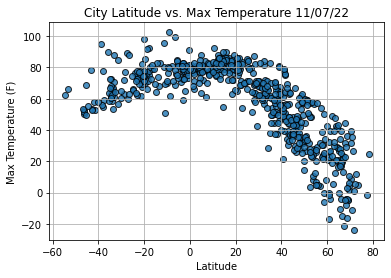

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


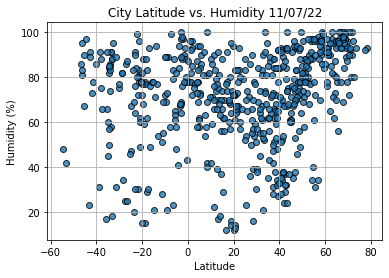

In [35]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity,edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

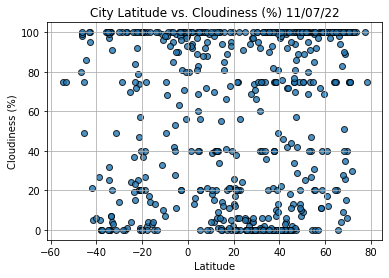

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

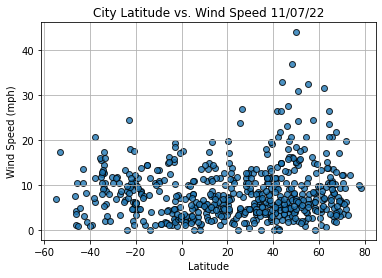

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()